In [1]:
import praw
import pandas as pd
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import en_core_web_sm
import spacy
import gensim
from gensim import corpora
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

ModuleNotFoundError: No module named 'vaderSentiment'

In [2]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [3]:
import praw
import pandas as pd
from praw.models import MoreComments
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
import emoji
import re
import en_core_web_sm
import spacy
import gensim
from gensim import corpora
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
# Reddit API credentials
reddit = praw.Reddit(client_id="2HIwI8CvGnWs4EhtmiDj8A", 
                     client_secret="tMg0CaYCq1JIK52M6zmlIkQMevD6Fg", 
                     user_agent="TEST API")

In [5]:
# Fetch the popular subreddit
subreddit = reddit.subreddit('popular')


In [6]:
# Print the titles, authors, upvotes and urls of the top 5 posts for the query "TDD"
for submission in subreddit.search('TDD', limit=5):
    print('Title:', submission.title)
    print('Author:', submission.author)
    print('Upvotes:', submission.score)
    print('URL:', submission.url)

Title: TDD is super important and useful!
Author: PizzaConBacon
Upvotes: 12586
URL: https://i.redd.it/nevopagtgzha1.jpg
Title: Is TDD anywhere to be found in the real world?
Author: SlowAside5
Upvotes: 263
URL: https://www.reddit.com/r/ExperiencedDevs/comments/10m8yr1/is_tdd_anywhere_to_be_found_in_the_real_world/
Title: TDD (Total Dorn Death) will be achieved!
Author: Histovan
Upvotes: 114
URL: https://v.redd.it/zvpmpif3iwta1
Title: Underrated TDD
Author: paperlaner94
Upvotes: 552
URL: https://v.redd.it/lhep0qnyd7ga1
Title: Hello, I have finished Amnesia TDD many times but this is the first time it happens to me
Author: Faelzor
Upvotes: 12
URL: https://www.reddit.com/r/Amnesia/comments/12ys7da/hello_i_have_finished_amnesia_tdd_many_times_but/


In [7]:
# Fetch the comments from a post
Post1 = reddit.submission(id='11164wl')


In [8]:
Comments_All = []
Post1.comments.replace_more(limit=None)
for comments in Post1.comments.list():
    Comments_All.append(comments.body)
    

In [9]:
print(Comments_All, '\n')
print('Total Comments Scrapped=', (len(Comments_All)))

['I love doing my TDD after I finish the development', 'Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"\n\nMe doing TDD: "UGH"', 'For me it\'s just another tool to use when I get annoyed with my other tools.\n\nI tend to pull it out when I\'m having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). \n\nIterating over that is better than being stuck.', 'Here is my three steps to test driven development:\n\n1. Write the tests\n2. Write the code\n3. Change the tests so the code passes', "I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.", 'Amateurs do TDD! We do IDD (incident driven development).', 'Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single h

In [10]:
# Data cleaning
List1 = Comments_All
List1 = [str(i) for i in List1]
string_uncleaned = ','.join(List1)
string_uncleaned

'I love doing my TDD after I finish the development,Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"\n\nMe doing TDD: "UGH",For me it\'s just another tool to use when I get annoyed with my other tools.\n\nI tend to pull it out when I\'m having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). \n\nIterating over that is better than being stuck.,Here is my three steps to test driven development:\n\n1. Write the tests\n2. Write the code\n3. Change the tests so the code passes,I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there\'s no time for testing because of the stakeholders\' deadline.,Amateurs do TDD! We do IDD (incident driven development).,Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single hyperlink to their

In [11]:
List1 = Comments_All
List1 = [str(i) for i in List1]
string_uncleaned = ','.join(List1)
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
string_emojiless = emoji_pattern.sub(r'', string_uncleaned)
print(string_emojiless)

I love doing my TDD after I finish the development,Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"

Me doing TDD: "UGH",For me it's just another tool to use when I get annoyed with my other tools.

I tend to pull it out when I'm having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). 

Iterating over that is better than being stuck.,Here is my three steps to test driven development:

1. Write the tests
2. Write the code
3. Change the tests so the code passes,I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.,Amateurs do TDD! We do IDD (incident driven development).,Had a partner company demo their TDD workflow to us once. Took them TWO HOURS to add a single hyperlink to their home page.

Bu

In [12]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_emojiless)
print(tokenized_string)


['I', 'love', 'doing', 'my', 'TDD', 'after', 'I', 'finish', 'the', 'development', 'Me', 'reading', 'about', 'TDD', 'This', 'is', 'amazing', 'It', 'makes', 'so', 'much', 'sense', 'Of', 'course', 'Me', 'doing', 'TDD', 'UGH', 'For', 'me', 'it', 's', 'just', 'another', 'tool', 'to', 'use', 'when', 'I', 'get', 'annoyed', 'with', 'my', 'other', 'tools', 'I', 'tend', 'to', 'pull', 'it', 'out', 'when', 'I', 'm', 'having', 'the', 'programmer', 'version', 'of', 'writers', 'block', 'It', 'then', 'helps', 'me', 'to', 'start', 'with', 'a', 'known', 'set', 'of', 'conditions', 'the', 'failing', 'test', 'and', 'then', 'work', 'toward', 'a', 'specific', 'solution', 'a', 'successful', 'test', 'Iterating', 'over', 'that', 'is', 'better', 'than', 'being', 'stuck', 'Here', 'is', 'my', 'three', 'steps', 'to', 'test', 'driven', 'development', '1', 'Write', 'the', 'tests', '2', 'Write', 'the', 'code', '3', 'Change', 'the', 'tests', 'so', 'the', 'code', 'passes', 'I', 'love', 'when', 'prospective', 'employers'

In [13]:
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

['i', 'love', 'doing', 'my', 'tdd', 'after', 'i', 'finish', 'the', 'development', 'me', 'reading', 'about', 'tdd', 'this', 'is', 'amazing', 'it', 'makes', 'so', 'much', 'sense', 'of', 'course', 'me', 'doing', 'tdd', 'ugh', 'for', 'me', 'it', 's', 'just', 'another', 'tool', 'to', 'use', 'when', 'i', 'get', 'annoyed', 'with', 'my', 'other', 'tools', 'i', 'tend', 'to', 'pull', 'it', 'out', 'when', 'i', 'm', 'having', 'the', 'programmer', 'version', 'of', 'writers', 'block', 'it', 'then', 'helps', 'me', 'to', 'start', 'with', 'a', 'known', 'set', 'of', 'conditions', 'the', 'failing', 'test', 'and', 'then', 'work', 'toward', 'a', 'specific', 'solution', 'a', 'successful', 'test', 'iterating', 'over', 'that', 'is', 'better', 'than', 'being', 'stuck', 'here', 'is', 'my', 'three', 'steps', 'to', 'test', 'driven', 'development', '1', 'write', 'the', 'tests', '2', 'write', 'the', 'code', '3', 'change', 'the', 'tests', 'so', 'the', 'code', 'passes', 'i', 'love', 'when', 'prospective', 'employers'

In [14]:
nlp = en_core_web_sm.load()
all_stopwords = nlp.Defaults.stop_words
text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]
print(tokens_without_sw)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'makes', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tools', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writers', 'block', 'helps', 'start', 'known', 'set', 'conditions', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'steps', 'test', 'driven', 'development', '1', 'write', 'tests', '2', 'write', 'code', '3', 'change', 'tests', 'code', 'passes', 'love', 'prospective', 'employers', 'clients', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholders', 'deadline', 'amateurs', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hours', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pass', '8', 'tests', 'fine', 'better', 'way', 'fix', 'bugs', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smas

In [15]:
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in tokens_without_sw]
print(lemmatized_tokens)

['love', 'tdd', 'finish', 'development', 'reading', 'tdd', 'amazing', 'make', 'sense', 'course', 'tdd', 'ugh', 's', 'tool', 'use', 'annoyed', 'tool', 'tend', 'pull', 'm', 'having', 'programmer', 'version', 'writer', 'block', 'help', 'start', 'known', 'set', 'condition', 'failing', 'test', 'work', 'specific', 'solution', 'successful', 'test', 'iterating', 'better', 'stuck', 'step', 'test', 'driven', 'development', '1', 'write', 'test', '2', 'write', 'code', '3', 'change', 'test', 'code', 'pass', 'love', 'prospective', 'employer', 'client', 'excited', 'understanding', 'tdd', 'agile', 'tell', 's', 'time', 'testing', 'stakeholder', 'deadline', 'amateur', 'tdd', 'idd', 'incident', 'driven', 'development', 'partner', 'company', 'demo', 'tdd', 'workflow', 'took', 'hour', 'add', 'single', 'hyperlink', 'home', 'page', 'boy', 'hyperlink', 'pas', '8', 'test', 'fine', 'better', 'way', 'fix', 'bug', 'great', 'greenfield', 'dev', 'know', 'structure', 'building', 's', 'great', 'smashing', 'boring', '

In [16]:
dictionary = corpora.Dictionary([lemmatized_tokens])
corpus = [dictionary.doc2bow(text) for text in [lemmatized_tokens]]

In [17]:
num_topics = 5
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

In [19]:
 #Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for comment in Comments_All:
     vs = analyzer.polarity_scores(comment)
     sentiments.append(vs['compound'])

df = pd.DataFrame({'Comment': Comments_All, 'Sentiment': sentiments})
print(df)

                                               Comment  Sentiment
0    I love doing my TDD after I finish the develop...     0.6369
1    Me reading about TDD : "This is amazing. It ma...     0.2146
2    For me it's just another tool to use when I ge...     0.2023
3    Here is my three steps to test driven developm...     0.0000
4    I love when prospective employers or clients g...     0.6901
..                                                 ...        ...
448  It's only slower before you've gotten used to ...     0.0000
449                              You got any openings?     0.0000
450  > For instance the writing to a file or the co...     0.9791
451  Do you have any tricks for having tons of test...    -0.1280
452  Well on the bright side you will have fewer te...     0.9906

[453 rows x 2 columns]


In [23]:
corpus = [dictionary.doc2bow(comment.lower().split()) for comment in Comments_All]
lda_scores = []
for doc in corpus:
    scores = lda_model[doc]
    topic = max(scores, key=lambda x: x[1])[0]
    lda_scores.append(topic)

df['LDA_Topic'] = lda_scores


In [24]:
grouped = df.groupby('LDA_Topic')
for name, group in grouped:
    mean_sentiment = group['Sentiment'].mean()
    print(f"Topic {name}: Average Sentiment Score: {mean_sentiment}\n")


Topic 0: Average Sentiment Score: 0.025042857142857144

Topic 1: Average Sentiment Score: 0.17847222222222212



In [25]:
for name, group in grouped:
    print(f"Top comments for Topic {name}:")
    top_comments = group.nlargest(10, 'Sentiment')
    print(top_comments, '\n')


Top comments for Topic 0:
                                           Comment  Sentiment  LDA_Topic
234                               Mine does it! :D     0.6514          0
214                               That’s the joke.     0.2960          0
62                                       [removed]     0.0000          0
79                                       [deleted]     0.0000          0
104  I'm all three of these guys at the same time!     0.0000          0
115                                           BDD?     0.0000          0
135                                      [removed]     0.0000          0
138                            This is the answer!     0.0000          0
139                                     So... DDT?     0.0000          0
145                                        My man!     0.0000          0 

Top comments for Topic 1:
                                               Comment  Sentiment  LDA_Topic
53   A few things here:\n\nFirst what is the purpos...     0.9941 

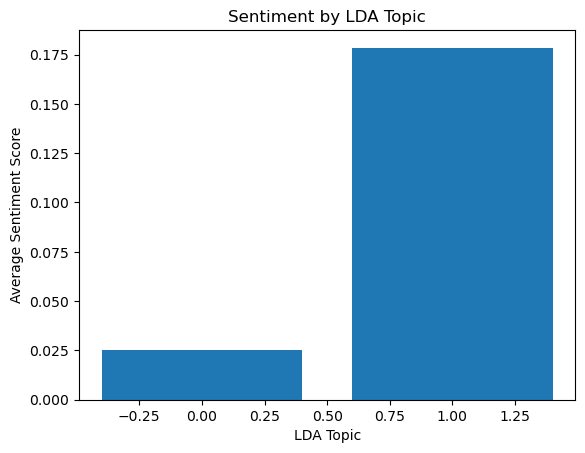

In [26]:
import matplotlib.pyplot as plt

# Analyze sentiment by LDA topic
grouped = df.groupby('LDA_Topic')
sentiment_by_topic = {}
for name, group in grouped:
    mean_sentiment = group['Sentiment'].mean()
    sentiment_by_topic[name] = mean_sentiment

# Create a bar chart of sentiment by topic
plt.bar(sentiment_by_topic.keys(), sentiment_by_topic.values())
plt.xlabel('LDA Topic')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment by LDA Topic')
plt.show()


In [27]:
analyzer = SentimentIntensityAnalyzer()

# Create a dictionary to store sentiment scores for each topic
sentiment_by_topic = {}

# Loop through each comment in the corpus
for i, comment in enumerate(Comments_All):
    
    # Analyze the sentiment of the comment using VADER
    vs = analyzer.polarity_scores(comment)
    
    # Get the corresponding LDA topic for the comment
    topic = lda_scores[i]
    
    # Add the sentiment score to the dictionary for the corresponding topic
    if topic not in sentiment_by_topic:
        sentiment_by_topic[topic] = {'pos': 0, 'neg': 0, 'neu': 0, 'compound': 0, 'count': 0}
    
    sentiment_by_topic[topic]['pos'] += vs['pos']
    sentiment_by_topic[topic]['neg'] += vs['neg']
    sentiment_by_topic[topic]['neu'] += vs['neu']
    sentiment_by_topic[topic]['compound'] += vs['compound']
    sentiment_by_topic[topic]['count'] += 1
    
# Calculate the average sentiment score for each topic
for topic in sentiment_by_topic:
    count = sentiment_by_topic[topic]['count']
    if count > 0:
        sentiment_by_topic[topic]['pos'] /= count
        sentiment_by_topic[topic]['neg'] /= count
        sentiment_by_topic[topic]['neu'] /= count
        sentiment_by_topic[topic]['compound'] /= count
    
    # Print the average sentiment scores for each topic
    print(f"Topic {topic}: Average Sentiment Score - Positive: {sentiment_by_topic[topic]['pos']:.2f}, "
          f"Negative: {sentiment_by_topic[topic]['neg']:.2f}, "
          f"Neutral: {sentiment_by_topic[topic]['neu']:.2f}, "
          f"Compound: {sentiment_by_topic[topic]['compound']:.2f}")


Topic 1: Average Sentiment Score - Positive: 0.11, Negative: 0.06, Neutral: 0.82, Compound: 0.18
Topic 0: Average Sentiment Score - Positive: 0.05, Negative: 0.02, Neutral: 0.93, Compound: 0.03


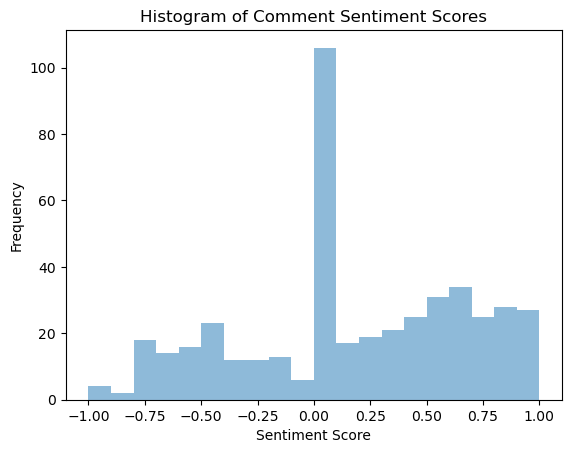

In [28]:
import matplotlib.pyplot as plt

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Get sentiment scores for each comment
scores = []
for sentence in Comments_All:
    vs = analyzer.polarity_scores(sentence)
    scores.append(vs['compound'])

# Plot histogram of sentiment scores
plt.hist(scores, bins=20, range=(-1, 1), alpha=0.5)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Comment Sentiment Scores')
plt.show()


In [29]:
from afinn import Afinn

# Initialize AFINN analyzer
af = Afinn()

# Analyze sentiment for each comment
for comment in Comments_All:
    score = af.score(comment)
    print(comment)
    print(f"AFINN Sentiment Score: {score}\n")


I love doing my TDD after I finish the development
AFINN Sentiment Score: 3.0

Me reading about TDD : "This is amazing. It makes so much sense ! Of course !"

Me doing TDD: "UGH"
AFINN Sentiment Score: 2.0

For me it's just another tool to use when I get annoyed with my other tools.

I tend to pull it out when I'm having the programmer version of "writers block". It then helps me to start with a known set of conditions (the failing test), and then work toward a specific solution (a successful test). 

Iterating over that is better than being stuck.
AFINN Sentiment Score: 1.0

Here is my three steps to test driven development:

1. Write the tests
2. Write the code
3. Change the tests so the code passes
AFINN Sentiment Score: 0.0

I love when prospective employers or clients get really excited about your understanding of TDD and Agile, then tell you there's no time for testing because of the stakeholders' deadline.
AFINN Sentiment Score: 5.0

Amateurs do TDD! We do IDD (incident driven d

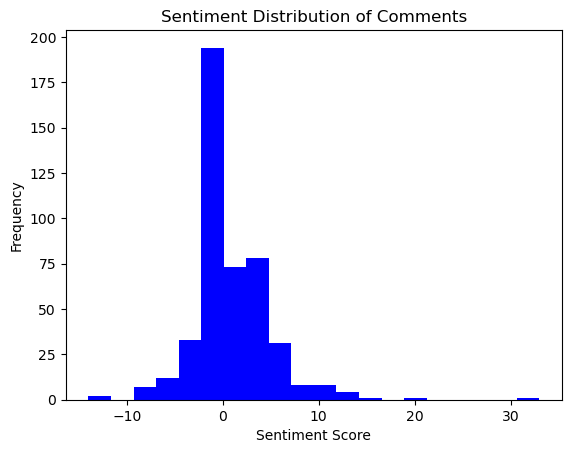

In [31]:
import matplotlib.pyplot as plt

# Get the sentiment scores
sentiment_scores = [af.score(comment) for comment in Comments_All]

# Create a histogram
plt.hist(sentiment_scores, bins=20, color='blue')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Comments')

# Show the plot
plt.show()


In [32]:
from afinn import Afinn

afinn = Afinn()

# Apply AFINN to each comment
afinn_scores = []
for comment in Comments_All:
    score = afinn.score(comment)
    afinn_scores.append(score)

# Add AFINN scores to dataframe
df['AFINN_Score'] = afinn_scores

# Aggregate AFINN scores by LDA topic
grouped = df.groupby('LDA_Topic')
for name, group in grouped:
    mean_sentiment = group['AFINN_Score'].mean()
    print(f"Topic {name}: Average AFINN Score: {mean_sentiment}\n")

    # Print top 10 comments with highest AFINN scores
    top_comments = group.nlargest(10, 'AFINN_Score')
    print(top_comments, '\n')


Topic 0: Average AFINN Score: 0.0

                                           Comment  Sentiment  LDA_Topic  \
214                               That’s the joke.      0.296          0   
62                                       [removed]      0.000          0   
79                                       [deleted]      0.000          0   
104  I'm all three of these guys at the same time!      0.000          0   
115                                           BDD?      0.000          0   
135                                      [removed]      0.000          0   
138                            This is the answer!      0.000          0   
139                                     So... DDT?      0.000          0   
145                                        My man!      0.000          0   
146                                      r/sarcasm      0.000          0   

     AFINN_Score  
214          2.0  
62           0.0  
79           0.0  
104          0.0  
115          0.0  
135          0

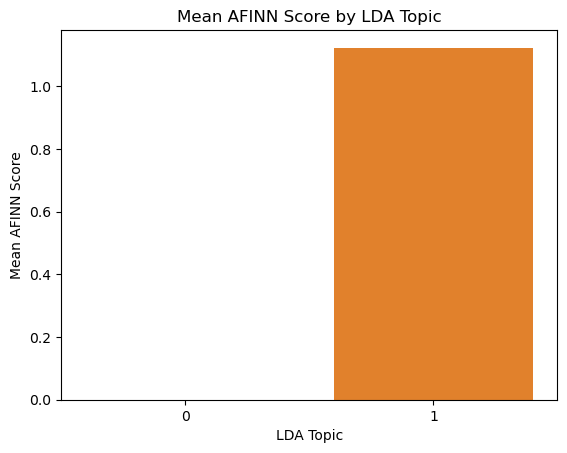

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# calculate mean AFINN score for each LDA topic
afinn_scores = df.groupby('LDA_Topic')['AFINN_Score'].mean()

# create bar plot
sns.barplot(x=afinn_scores.index, y=afinn_scores.values)
plt.title('Mean AFINN Score by LDA Topic')
plt.xlabel('LDA Topic')
plt.ylabel('Mean AFINN Score')
plt.show()
